In [54]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

In [55]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [56]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Text(0.5, 1.0, 'HomePlanet')

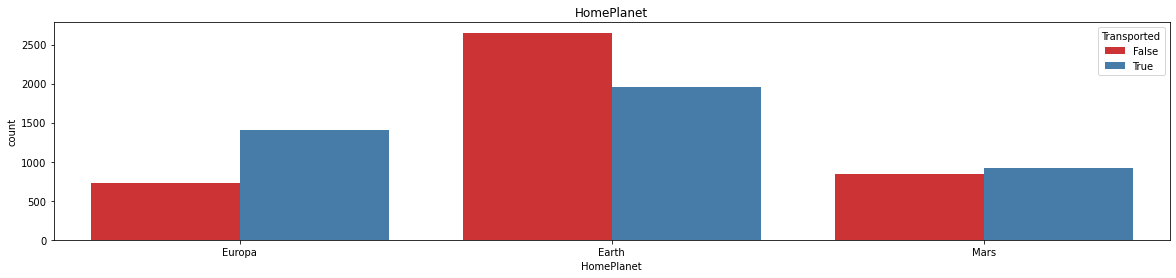

In [57]:
plt.figure(figsize=(20,4))
sns.countplot(data=train, x='HomePlanet', hue='Transported',palette='Set1')
plt.title('HomePlanet')

<AxesSubplot:>

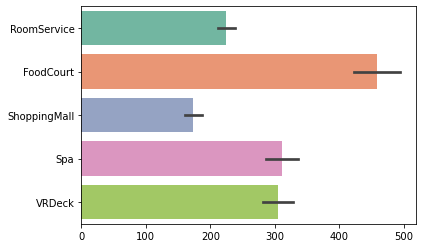

In [58]:
expenditure_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
sns.barplot(data=train[expenditure_columns], orient="h", palette="Set2")

<AxesSubplot:>

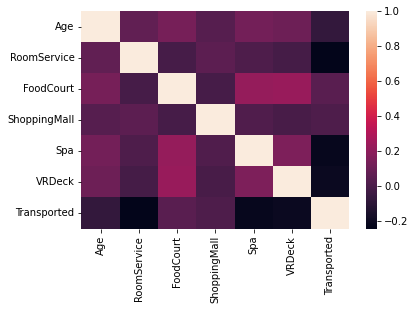

In [59]:

pp=train.corr()
sns.heatmap(pp)

In [60]:
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [61]:
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', expand=True)

In [62]:
train['Expenditure']= train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
test['Expenditure']= test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

<Figure size 72x1080 with 0 Axes>

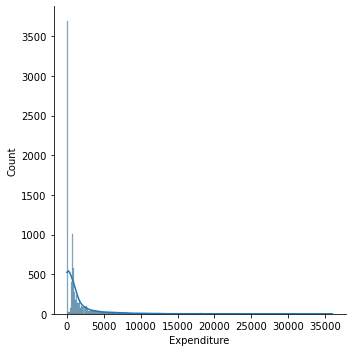

In [63]:
plt.figure(figsize=(1,15))
sns.displot(train, x="Expenditure", kde=True)

In [64]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

train["HomePlanet"] = l.fit_transform(train["HomePlanet"])
train["Transported"] = l.fit_transform(train["Transported"])
train["VIP"] = l.fit_transform(train["VIP"])
train["Destination"] = l.fit_transform(train["Destination"])
train["Deck"] = l.fit_transform(train["Deck"])
train["CryoSleep"] = l.fit_transform(train["CryoSleep"])


In [65]:
test["HomePlanet"] = l.fit_transform(test["HomePlanet"])

test["VIP"] = l.fit_transform(test["VIP"])
test["Destination"] = l.fit_transform(test["Destination"])
test["Deck"] = l.fit_transform(test["Deck"])
test["CryoSleep"] = l.fit_transform(test["CryoSleep"])


In [66]:
for col in train.columns:
    if train[col].dtypes=='object':
        train[col]=train[col].fillna(train[col].mode()[0])
    else:
        train[col]=train[col].fillna(train[col].median())
        
for col in test.columns:
    if test[col].dtypes=='object':
        test[col]=test[col].fillna(test[col].mode()[0])
    else:
        test[col]=test[col].fillna(test[col].median())

In [67]:
x_train=train[['HomePlanet','CryoSleep','Destination','Age','VIP','Deck','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
y_train=train[['Transported']]
x_test=test[['HomePlanet','CryoSleep','Destination','Age','VIP','Deck','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

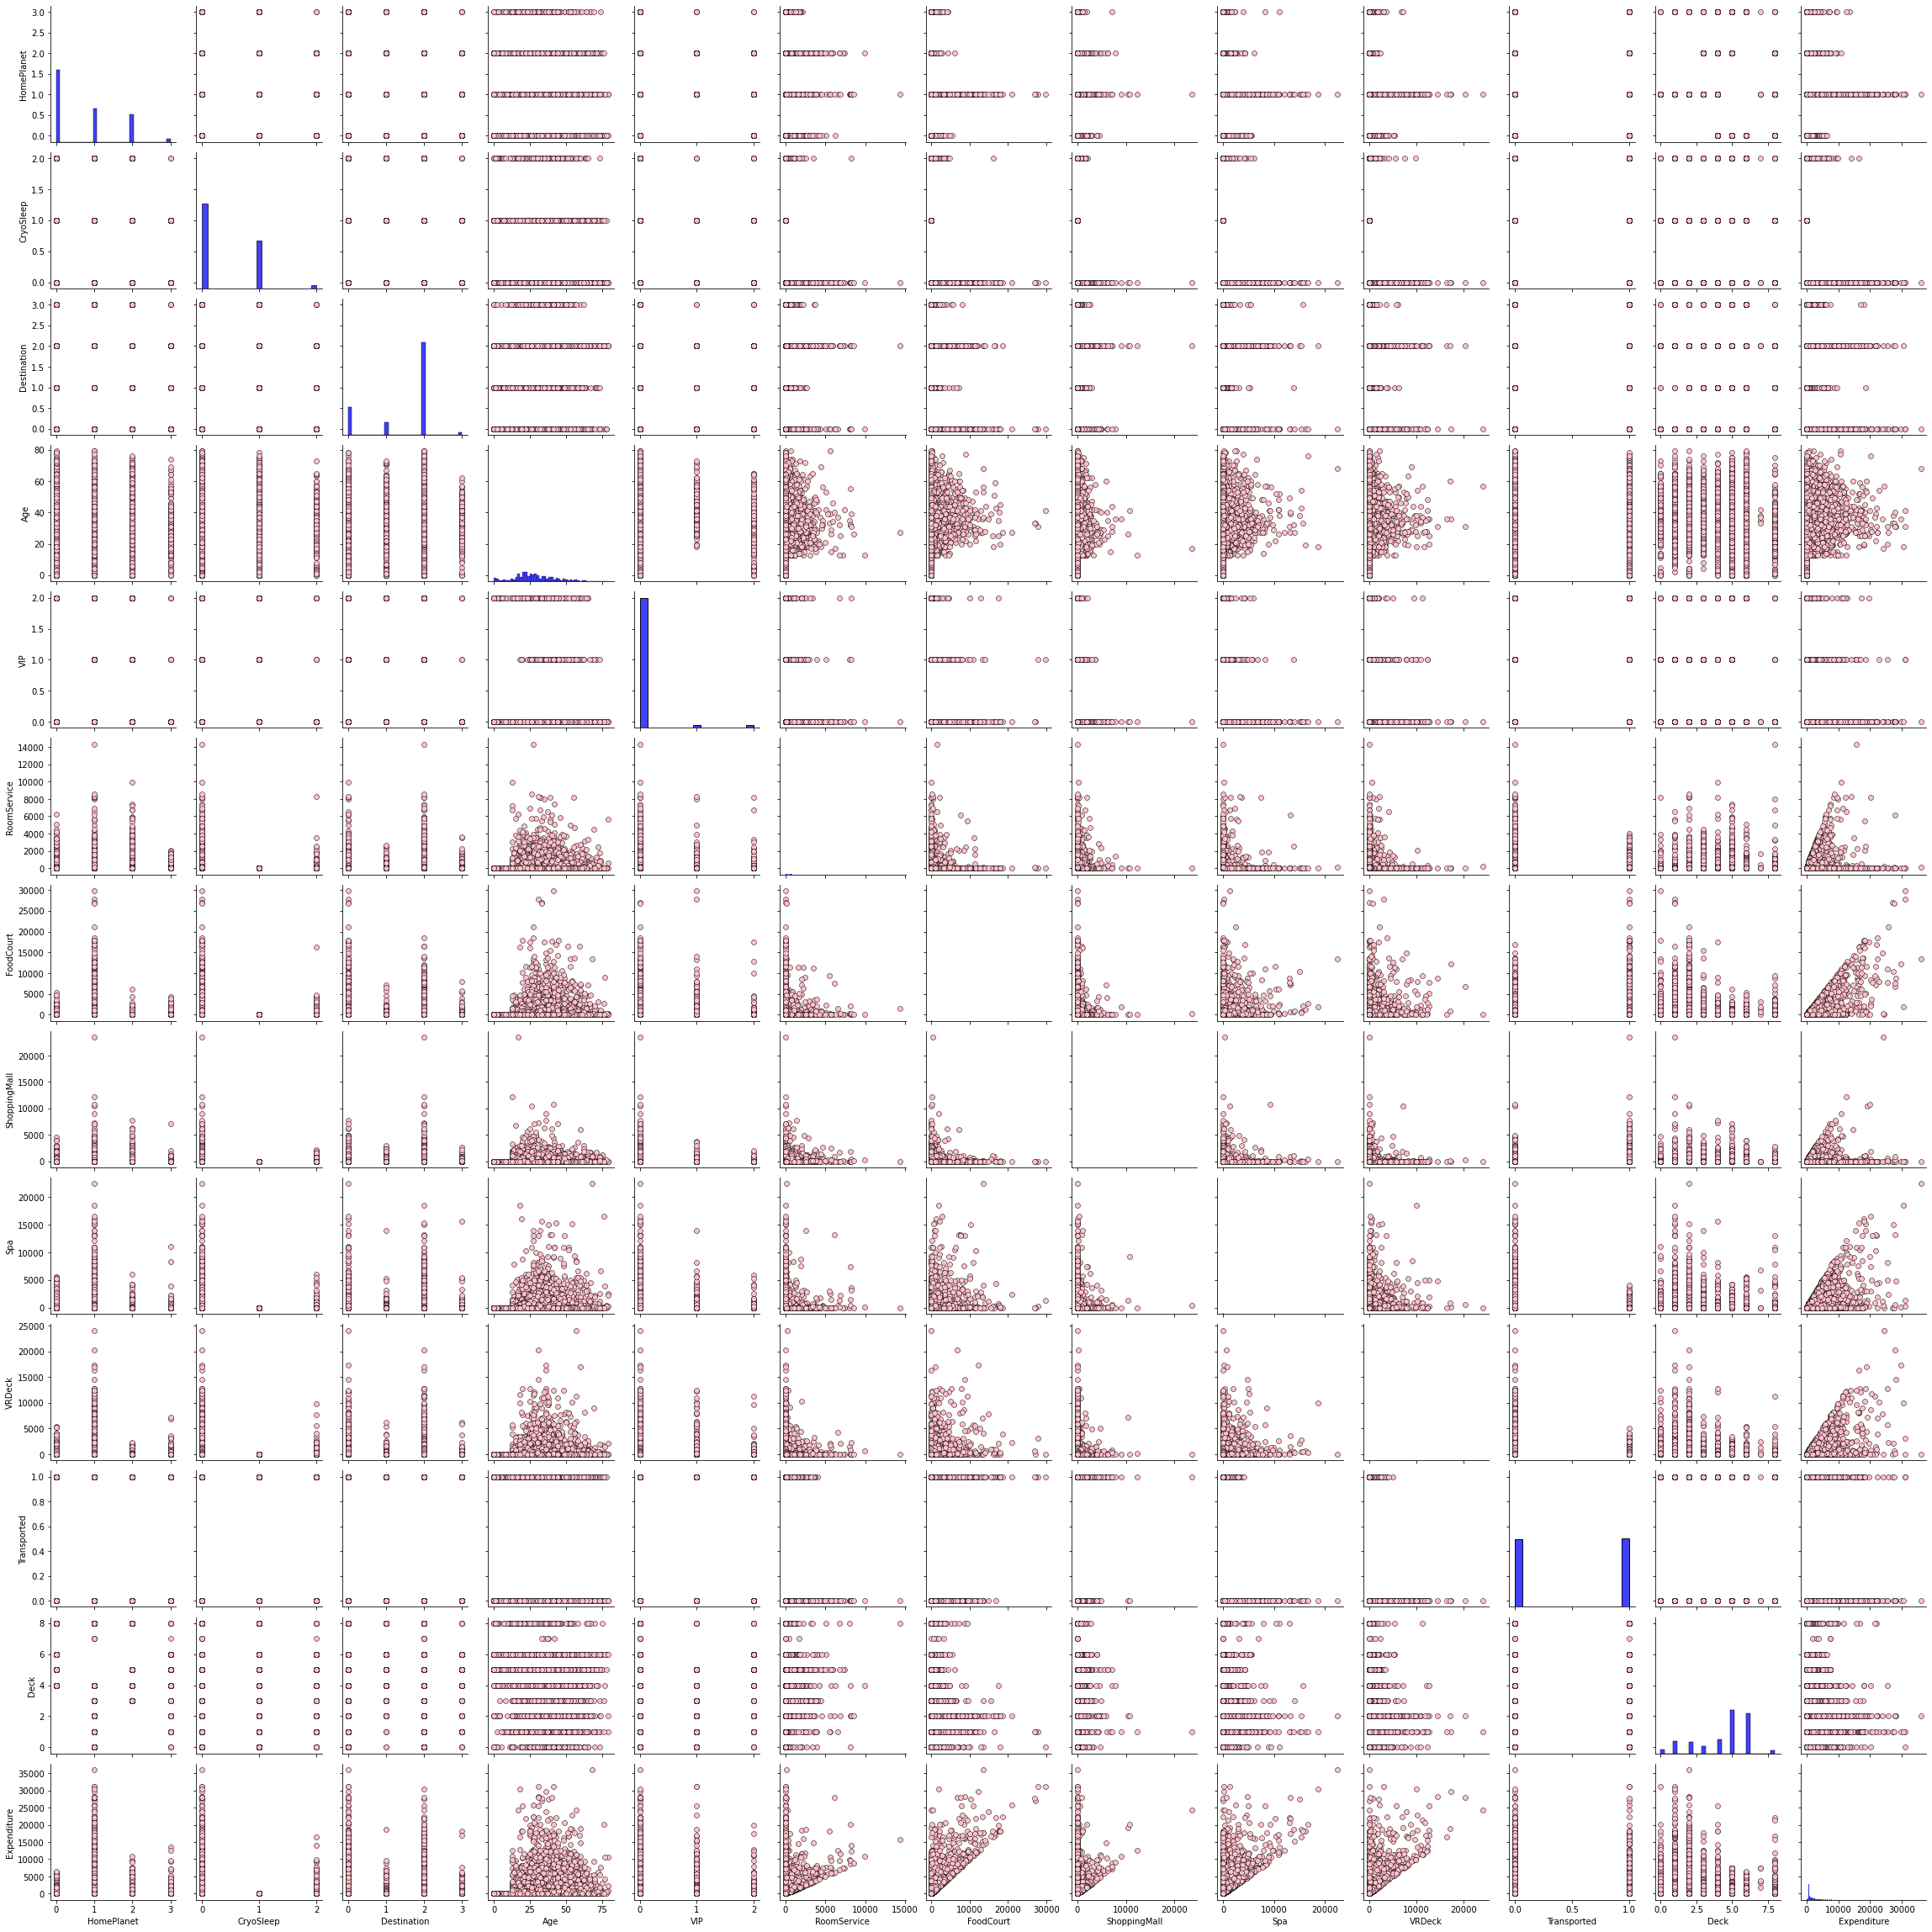

In [68]:
sns.pairplot(train,plot_kws={"color":"pink","edgecolor":"black"},diag_kws={"color":"blue","edgecolor":"black"})

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

/var/folders/gj/6w82t4757zjcl7v6tv4k4xdc0000gn/T/ipykernel_86997/1801849259.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier()

In [70]:
rfc_pred = rfc.predict(x_test)

In [71]:
submission_spaceship = pd.DataFrame({"PassengerId":test['PassengerId'], "Transported":rfc_pred})
submission_spaceship['Transported'] =submission_spaceship['Transported'].apply(lambda x:True if x==1 else False)
submission_spaceship

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [72]:
submission_spaceship.to_csv('submission.csv', index = False)